In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib as mpl
from pylab import cm
%matplotlib inline

In [2]:
data_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
data_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [15]:
# CHANGE THIS TO SOMETHING ELSE #

# Edit certain country names for aesthetics
for i in [data_confirmed, data_recovered, data_deaths]:
    i.loc[i['Country/Region'] == 'Korea, South', 'Country/Region'] = 'S. Korea'
    i.loc[i['Country/Region'] == 'US', 'Country/Region'] = 'USA'
    i.loc[i['Country/Region'] == 'United Kingdom', 'Country/Region'] = 'UK'

In [16]:
def covidData(country, output=1, start=100):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # Find first non-zero index to get day 0 (first confirmed case)
    day0 = -1
    for i in range(len(data_conf)):
        if output == 1 or output == 4:
            if data_conf[i] >= start:
                day0 = i
                break
        elif output == 2:
            if data_rec[i] >= start:
                day0 = i
                break
        else:
            if data_dea[i] >= start:
                day0 = i
                break
    if day0 == -1:
        return []
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        return data_conf[day0:]
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        return data_rec[day0:]
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        return data_dea[day0:]
    
    # If output is 4 (net), return the net number of cases
    if output == 4:
        data_output = (data_conf.subtract(data_rec)).subtract(data_dea)
        return data_output[day0:]

In [33]:
# Confirmed cases

# Load all country names into a list
countries = []
for i in data_confirmed['Country/Region']:
    if i not in countries:
        countries.append(i)

# List of country names to highlight in the plot
highlighted_countries = ['Israel', 'S. Korea', 'Netherlands', 'USA', 'UK']

In [31]:
# Font properties
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 24

# Axes properties
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['axes.labelpad'] = 10

# Tick properties
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0

# Line properties
mpl.rcParams['lines.solid_capstyle'] = 'round'

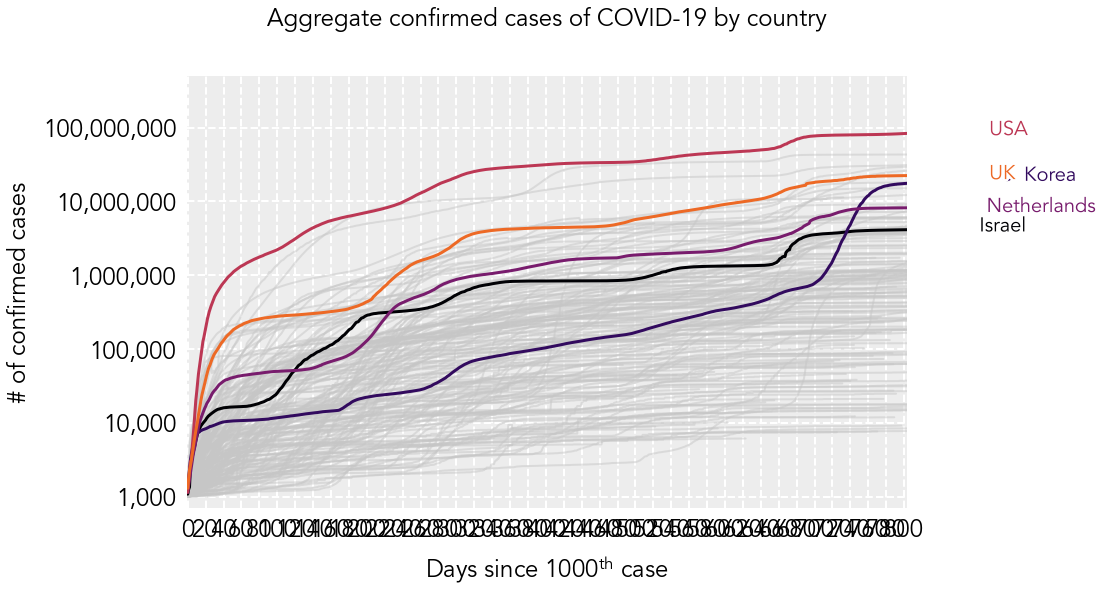

In [37]:
# Plot of confirmed cases

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(10,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--', zorder=1)

# Range of plot (x-axis and y-axis)
x_max = 800 # Days
y_max = 5*10**8 # Cases

# Padding for text labels
left_pad = 0

# Remove increase section since most curves have flattened
# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [1000]
    total_cases = 1000
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3, zorder=2)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 1, 1000)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=3)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.5, zorder=2)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

# Set y-axis tick intervals and labels
ax.set_yticks([1000, 10000, 100000, 1000000, 10000000,100000000])
ax.set_yticklabels(['1,000', '10,000', '100,000', '1,000,000','10,000,000','100,000,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 1000$\mathregular{^{th}}$ case')
ax.set_ylabel('# of confirmed cases')

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(700, y_max)

# Title
ax.set_title('Aggregate confirmed cases of COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
# dpi = 300 # Resolution of image
# plt.savefig('covid-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()